In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import cv2

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense

In [2]:
# CONVOLUTIONAL NETWORK
from tensorflow.keras.layers import Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [3]:
img_size = 100

In [4]:
DATADIR = "chest_xray/train"

CATEGORIES= ["NORMAL", "PNEUMONIA"]
originalTrain=[]
grayTrain=[]
training_data=[]
label_data=[]

for category in CATEGORIES:
    path=os.path.join(DATADIR, category)
    class_num=CATEGORIES.index(category)
    # print(os.listdir(path))
    for img in os.listdir(path):
        originalImage=cv2.imread(os.path.join(path,img))
        grayImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)
        (thresh, blackAndWhiteImage) = cv2.threshold(grayImage, 127, 255, cv2.THRESH_BINARY)
        img_array=blackAndWhiteImage
        new_array = cv2.resize(img_array, (img_size, img_size))
        training_data.append([new_array])
        gray_new_array = cv2.resize(grayImage, (img_size, img_size))
        grayTrain.append([gray_new_array])
        original_new_array = cv2.resize(originalImage, (img_size, img_size))
        originalTrain.append([original_new_array])
        label_data.append([class_num])

In [5]:
X_train=[]
y_train=[]

In [6]:
for image in grayTrain:
    X_train.append(image)

In [7]:
X_train= np.array(X_train).reshape(-1,img_size,img_size)
y_train = np.array(label_data)
print(X_train.shape)
print(y_train.shape)

(5216, 100, 100)
(5216, 1)


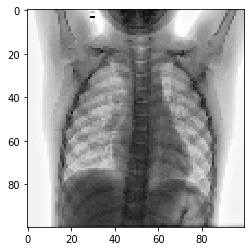

In [8]:
plt.imshow(X_train[0,:,:], cmap=plt.cm.Greys)

In [9]:
# Our image is an array of pixels ranging from 0 to 255
X_train[0, :, :]

array([[22, 18, 24, ..., 94, 93, 93],
       [19, 20, 14, ..., 97, 93, 90],
       [20, 19, 15, ..., 94, 91, 88],
       ...,
       [29, 29, 29, ..., 21, 23, 24],
       [30, 27, 26, ..., 43, 46, 45],
       [38, 36, 37, ..., 86, 89, 91]], dtype=uint8)

In [10]:
# We want to flatten our image of 100x100 pixels to a 1D array of 10,000 pixels
ndims = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], ndims)

y_train = y_train.reshape(-1,)

print("Training Shape:", X_train.shape)
print("Training Data Labels Shape:", y_train.shape)

Training Shape: (5216, 10000)
Training Data Labels Shape: (5216,)


In [11]:
# Next, we normalize our training data to be between 0 and 1

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X_train)

X_train = scaler.transform(X_train)

In [12]:
# We need to convert our target labels (expected values) to categorical data
num_classes = 2
y_train = to_categorical(y_train, num_classes)
y_train[0]

array([1., 0.], dtype=float32)

In [13]:
# convolutional network

X_train = np.array(X_train).reshape(-1, img_size, img_size, 1)


model = Sequential()

model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 96, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 48, 48, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 73728)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               9437312   
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
Total params: 9,438,402
Trainable params: 9,438,402
Non-trainable params: 0
______________________________________________

In [20]:
# Fit (train) the model
history = model.fit(
            X_train,
            y_train,
            batch_size=128,
            epochs=2,
            shuffle=True,
            verbose=1,
            validation_data=(X_test, y_test))

Epoch 1/2
41/41 [==============================] - 49s 1s/step - loss: 0.7669 - accuracy: 0.7841 - val_loss: 0.4300 - val_accuracy: 0.7788
Epoch 2/2
41/41 [==============================] - 53s 1s/step - loss: 0.1535 - accuracy: 0.9440 - val_loss: 0.5087 - val_accuracy: 0.7772


In [21]:
test_loss, test_acc = model.evaluate(X_train,  y_train, verbose=1)

163/163 [==============================] - 17s 105ms/step - loss: 0.1046 - accuracy: 0.9618


In [22]:
predictions = model.evaluate(X_test,  y_test, verbose=1)

20/20 [==============================] - 2s 94ms/step - loss: 0.5087 - accuracy: 0.7772


In [ ]:
#model.save("xray_convNet_100px_87_test_acc.h5")

In [ ]:
# from tensorflow.keras.models import load_model
# model = load_model("xray_convNet_86_test_acc.h5")

In [16]:
# Test Dataset Extraction

TEST_DATADIR = "chest_xray/test"

TEST_CATEGORIES= ["NORMAL", "PNEUMONIA"]
originalTest=[]
grayTest=[]
test_data=[]
test_label_data=[]

for category in TEST_CATEGORIES:
    path=os.path.join(TEST_DATADIR, category)
    class_num=CATEGORIES.index(category)
    # print(os.listdir(path))
    for img in os.listdir(path):
        originalImage=cv2.imread(os.path.join(path,img))
        grayImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)
        (thresh, blackAndWhiteImage) = cv2.threshold(grayImage, 127, 255, cv2.THRESH_BINARY)
        img_array=blackAndWhiteImage
        new_array = cv2.resize(img_array, (img_size, img_size))
        test_data.append([new_array])
        gray_new_array = cv2.resize(grayImage, (img_size, img_size))
        grayTest.append([gray_new_array])
        original_new_array = cv2.resize(originalImage, (img_size, img_size))
        originalTest.append([original_new_array])
        test_label_data.append([class_num])

In [17]:
# Test Dataset Preprocessing

X_test=[]
y_test=[]

for image in grayTest:
    X_test.append(image)

X_test = np.array(X_test).reshape(-1,img_size,img_size)
y_test = np.array(test_label_data)

ndims = X_test.shape[1] * X_test.shape[2]
X_test = X_test.reshape(X_test.shape[0], ndims)

y_test = y_test.reshape(-1,)


scaler = MinMaxScaler().fit(X_test)
X_test = scaler.transform(X_test)

num_classes = 2
y_test = to_categorical(y_test, num_classes)


In [18]:
# CONVOLUTIONAL NETWORK

X_test = np.array(X_test).reshape(-1, img_size, img_size, 1)


In [19]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5216, 100, 100, 1)
(5216, 2)
(624, 100, 100, 1)
(624, 2)


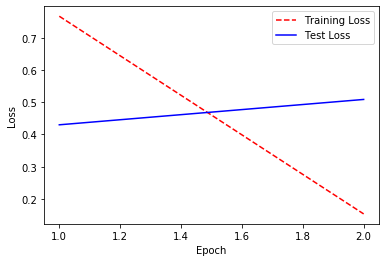

In [23]:
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show();

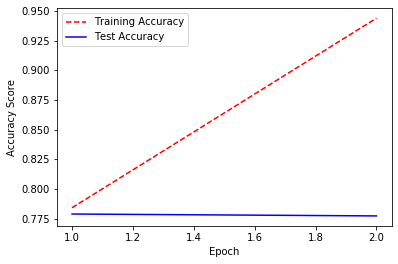

In [25]:
training_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]
plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b-")
# Visualize accuracy history
plt.legend(["Training Accuracy", "Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy Score")
plt.show();

In [ ]:
#plt.imshow(scaler.inverse_transform(test).reshape(100, 100), cmap=plt.cm.Greys)

In [ ]:
test = np.expand_dims(X_test[105], axis=0)
print(f"One-Hot-Encoded Prediction: {model.predict(test).round()}")
print(f"Predicted class: {model.predict_classes(test)}")

In [ ]:
test = np.expand_dims(X_test[300], axis=0)
print(f"One-Hot-Encoded Prediction: {model.predict(test).round()}")
print(f"Predicted class: {model.predict_classes(test)}")

In [ ]:
test = np.expand_dims(X_test[315], axis=0)
print(f"One-Hot-Encoded Prediction: {model.predict(test).round()}")
print(f"Predicted class: {model.predict_classes(test)}")

In [ ]:
test = np.expand_dims(X_test[250], axis=0)
print(f"One-Hot-Encoded Prediction: {model.predict(test).round()}")
print(f"Predicted class: {model.predict_classes(test)}")

In [ ]:
test = np.expand_dims(X_test[56], axis=0)
print(f"One-Hot-Encoded Prediction: {model.predict(test).round()}")
print(f"Predicted class: {model.predict_classes(test)}")

In [ ]:
test = np.expand_dims(X_test[0], axis=0)
print(f"One-Hot-Encoded Prediction: {model.predict(test).round()}")
print(f"Predicted class: {model.predict_classes(test)}")

In [ ]:
test = np.expand_dims(X_test[30], axis=0)
print(f"One-Hot-Encoded Prediction: {model.predict(test).round()}")
print(f"Predicted class: {model.predict_classes(test)}")

In [ ]:
test = np.expand_dims(X_test[300,:,:], axis=0)
print(f"Predicted class: {model.predict_classes(test)}")